# Image Classification

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as image
import tensorflow as tf
from tensorflow import keras

In [51]:
# Loading data
ds = open('data_files/galaxies/efigi.dat', 'r')

# Empty lists for the data
names = []  
types = []

# Appending information from data into lists
for line in ds:
    fields = line.split()
    names.append(fields[0])
    types.append(fields[1])

print(names)
print(types)

ndata = len(names)
imgsize = 64

['PGC0000212', 'PGC0000218', 'PGC0000255', 'PGC0000281', 'PGC0000282', 'PGC0000451', 'PGC0000548', 'PGC0000635', 'PGC0000639', 'PGC0000647', 'PGC0000670', 'PGC0000963', 'PGC0001058', 'PGC0001221', 'PGC0001224', 'PGC0001237', 'PGC0001293', 'PGC0001478', 'PGC0001523', 'PGC0001621', 'PGC0001713', 'PGC0001747', 'PGC0001781', 'PGC0001805', 'PGC0001841', 'PGC0001862', 'PGC0001909', 'PGC0001932', 'PGC0001936', 'PGC0002016', 'PGC0002035', 'PGC0002151', 'PGC0002182', 'PGC0002269', 'PGC0002288', 'PGC0002331', 'PGC0002352', 'PGC0002365', 'PGC0002388', 'PGC0002391', 'PGC0002440', 'PGC0002482', 'PGC0002501', 'PGC0002522', 'PGC0002527', 'PGC0002597', 'PGC0002600', 'PGC0002615', 'PGC0002768', 'PGC0002800', 'PGC0002805', 'PGC0002889', 'PGC0003072', 'PGC0003140', 'PGC0003232', 'PGC0003314', 'PGC0003377', 'PGC0003451', 'PGC0003496', 'PGC0003563', 'PGC0003566', 'PGC0003569', 'PGC0003584', 'PGC0003620', 'PGC0003781', 'PGC0003817', 'PGC0003830', 'PGC0003904', 'PGC0003960', 'PGC0003976', 'PGC0004116', 'PGC0

In [52]:
# This creates an array of 64 lists wihtin 64 lists all of which contain 3 zeroes. This is to store the pixel values
galaxies = np.zeros((ndata, imgsize, imgsize, 3))
labels = np.zeros(ndata, dtype='int')
print(labels)

# This loops through all the images in the directory and loads them into the array
for i in range(ndata):
    img = image.open('data_files/galaxies/png/' + str(names[i]) + '.png')

    imgResized = img.resize(size=(imgsize, imgsize))

    galaxies[i,:,:,:] = np.array(imgResized) / 255
    labels[i] = types[i]

print(galaxies)

[0 0 0 ... 0 0 0]
[[[[0.12941176 0.11372549 0.09411765]
   [0.07058824 0.09411765 0.10588235]
   [0.10196078 0.1254902  0.10588235]
   ...
   [0.07058824 0.0627451  0.14509804]
   [0.0627451  0.07058824 0.12156863]
   [0.10196078 0.07843137 0.12156863]]

  [[0.09803922 0.08627451 0.1254902 ]
   [0.08627451 0.04705882 0.17647059]
   [0.11372549 0.06666667 0.12156863]
   ...
   [0.10588235 0.08627451 0.07843137]
   [0.08627451 0.09411765 0.1372549 ]
   [0.0745098  0.07843137 0.14509804]]

  [[0.05490196 0.10980392 0.11764706]
   [0.09411765 0.07843137 0.17647059]
   [0.08235294 0.07843137 0.1254902 ]
   ...
   [0.05882353 0.11372549 0.09803922]
   [0.08627451 0.08627451 0.10196078]
   [0.03529412 0.10196078 0.09411765]]

  ...

  [[0.09411765 0.07843137 0.05882353]
   [0.07843137 0.0745098  0.10980392]
   [0.10588235 0.0745098  0.11372549]
   ...
   [0.05882353 0.06666667 0.1254902 ]
   [0.08235294 0.08235294 0.11764706]
   [0.08235294 0.08235294 0.13333333]]

  [[0.12941176 0.05882353 0

In [53]:
import random

# We want to create two datasets, one for training and one for testing. This takes the random index across 
# all the images and puts them in a list
size = labels.size
sample = random.sample([n for n in range(size)], int(0.3*size))

otherGalaxies = galaxies[sample,:,:,:]
trainGalaxies = np.delete(galaxies, sample, axis=0)
otherLabels = labels[sample]
trainLabels = np.delete(labels, sample, axis=0)

# Due to the value in the shape of these two, we know we did what we wanted to do.
print(otherGalaxies.shape)
print(train_set.shape)


(322, 64, 64, 3)
(754, 64, 64, 3)


In [54]:
# Setting another subsample set
size = otherLabels.size
subsample = random.sample([n for n in range(size)], int(size/2))

# Splitting into train and validation sets
valdLabels = otherLabels[subsample]
valdGalaxies = otherGalaxies[subsample,:,:,:]
testLabels = np.delete(otherLabels, subsample)
testGalaxies = np.delete(otherGalaxies, subsample, axis=0)

In [55]:
# The network is created by the Sequential function which is within the keras module
galNet = keras.Sequential([
    # The individual layer creates 96 feature maps by applying convulational filters to image arrays with 
    # dimensions as defined by input shape
    keras.layers.Conv2D(96, (8,8), activation='relu', input_shape=(imgsize,imgsize,3)),
    # To reduce the amount of data generated by the convolution, we set up a pooling layer that reduces the size of the data
    # by downsampling the feature maps.
    keras.layers.MaxPooling2D(pool_size=(4,4)),
    # This flattens the data into a one-dimensional array before they go through the 30 neurons
    keras.layers.Flatten(),
    # This takes the flattened array through a fully connected layer with 30 neurons
    keras.layers.Dense(30, activation='relu'),
    # The signals from the nurons are distributed to three output nodes which represent the three classes of galaxies part of the
    # dataset.
    keras.layers.Dense(3, activation='softmax')
])

galNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 57, 57, 96)        18528     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 18816)             0         
                                                                 
 dense_6 (Dense)             (None, 30)                564510    
                                                                 
 dense_7 (Dense)             (None, 3)                 93        
                                                                 
Total params: 583,131
Trainable params: 583,131
Non-trainable params: 0
________________________________________________

In [62]:
# Before the network can be trained, it needs to be compiled using this
galNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# The optimizer keyword specifies th enumerical optimization algorithm that will be used to adjust the weights of the connections
# The loss function is standard choice of loss function when using classification data
# Lastly, the metrics keyword indicates that we'll use the accuracy of the network to measure the performance of the network

In [63]:
results = galNet.fit(trainGalaxies, trainLabels, epochs=40, validation_data=(valdGalaxies, valdLabels))

Epoch 1/40
24/24 [==============================] - 2s 75ms/step - loss: 0.9158 - accuracy: 0.5451 - val_loss: 0.6415 - val_accuracy: 0.7267
Epoch 2/40
24/24 [==============================] - 2s 66ms/step - loss: 0.5273 - accuracy: 0.7679 - val_loss: 0.6356 - val_accuracy: 0.7019
Epoch 3/40
24/24 [==============================] - 2s 65ms/step - loss: 0.4250 - accuracy: 0.8263 - val_loss: 0.4056 - val_accuracy: 0.8199
Epoch 4/40
24/24 [==============================] - 2s 65ms/step - loss: 0.3671 - accuracy: 0.8395 - val_loss: 0.4108 - val_accuracy: 0.8199
Epoch 5/40
24/24 [==============================] - 2s 69ms/step - loss: 0.3151 - accuracy: 0.8740 - val_loss: 0.4434 - val_accuracy: 0.8012
Epoch 6/40
24/24 [==============================] - 2s 66ms/step - loss: 0.3099 - accuracy: 0.8727 - val_loss: 0.3420 - val_accuracy: 0.8509
Epoch 7/40
24/24 [==============================] - 2s 66ms/step - loss: 0.2711 - accuracy: 0.8966 - val_loss: 0.3390 - val_accuracy: 0.8509
Epoch 8/40
24

40


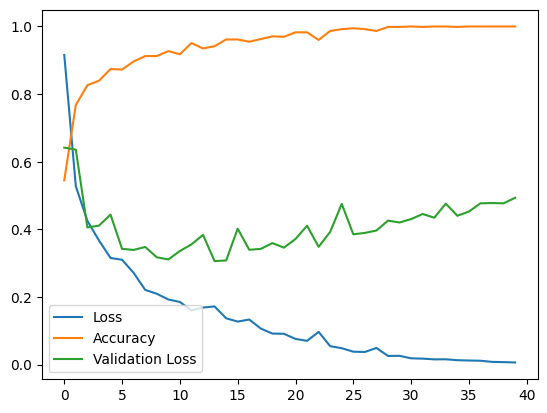

In [83]:
print(len(results.history['accuracy']))
plt.plot(range(40), results.history['loss'], label = 'Loss')
plt.plot(range(40), results.history['accuracy'], label = 'Accuracy')
plt.plot(range(40), results.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()